In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from distillation import antoineEthanolWater, wilsonActFact

In [3]:
def ActFactEquil(x,Tguess,P):
    T = fsolve(lambda T: ActFactRes(x,T,P), Tguess)
    [y,y2] = ActFact(x,T,P)
    return y,T
def ActFactRes(x,T,P):
    [y1,y2] = ActFact(x,T,P)
    res = 1-y1-y2
    return res
def ActFact(x,T,P):
    [p01,p02] = antoineEthanolWater(T)
    [gamma1,gamma2] = wilsonActFact(x,T)
    y1 = gamma1*p01*x/P
    y2 = gamma2*p02*(1-x)/P
    return y1,y2


Text(0.5, 0, 'Ethanol %')

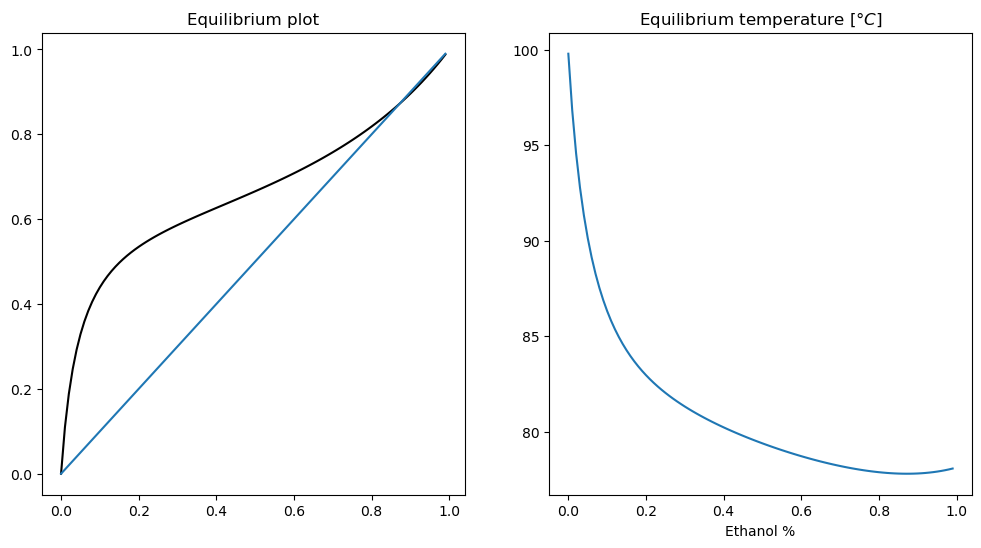

In [13]:
# Solve the equilibrium
T0 = 273+80
x = np.arange(0,1,0.01)
P = 1e5
Tguess = T0*np.ones(len(x))
[y,T] = ActFactEquil(x,Tguess,P)
# Plot the equilibrium
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].plot(x, y,'k')
ax[0].plot(x, x)
ax[0].set_title('Equilibrium plot')
#plt.axis([0, 1, 0, 1])
ax[1].plot(x,T-273)
ax[1].set_title(r'Equilibrium temperature $[\degree C]$')
ax[1].set_xlabel('Ethanol %')